<a href="https://colab.research.google.com/github/VickusWan/CSC869-Finalproject/blob/main/Estefanos_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install Packages

In [1]:
import subprocess

def install_required_packages():
    packages = [
        "pandas",
        "numpy",
        "Pillow",
        "opencv-python",
        "scikit-learn",
        "keras",
        "pathlib",
        "torch",
        "tensorflow",
    ]

    for package in packages:
        subprocess.call(["pip", "install", package])

In [ ]:
install_required_packages()

In [7]:
import pandas as pd
import numpy as np
from PIL import Image,ImageDraw
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib as mpl
import time
import os
import io
import seaborn as sns
import glob
import pickle
from PIL import Image
import random
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from pathlib import Path
from sklearn.model_selection import train_test_split
import torch
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.models import Model
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score, confusion_matrix
import keras
import keras.layers as layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from sklearn.model_selection import train_test_split

In [3]:
df1 = pd.read_csv('https://raw.githubusercontent.com/VickusWan/CSC869-Finalproject/main/cip_ctx_ctz_gen_multi_data.csv')
df1.head()

,prename,X393,X588,X747,X759,X774,X966,X1299,X1302,X1407,...,X4639956.3,X4640785.3,X4640908.3,X4640924.3,X4641031.3,X4641131.3,X4641217.3,X4641296.3,X4641439.3,X4641440.3
0,H100_S2_L001,2,1,2,4,3,3,3,3,4,...,3,4,4,2,1,3,1,3,3,1
1,H105_S3_L001,2,1,2,4,3,3,3,3,4,...,3,4,4,2,1,3,1,3,3,1
2,H108_S5_L001,2,1,2,4,3,3,0,0,4,...,3,4,4,2,1,3,1,3,3,1
3,H109_S2_L001,2,1,2,4,3,3,3,3,4,...,3,4,4,2,1,3,1,3,3,1
4,H113_S6_L001,0,0,2,4,3,3,3,3,4,...,3,4,0,0,2,3,1,3,3,1




#### df1: SNPs (single nucleotide polymorphism):

Features:

- prename: This is the isolate(sample) name.
- The other 60937 plus features are the SNPs

Encoding:
- A: Adenine = 1
- G: Guanine = 2
- C: Cytosine = 3
- T: Thymine = 4
- N: Null = 0 -> REFERENCE GENOME

In [4]:
df2 = pd.read_csv('https://raw.githubusercontent.com/VickusWan/CSC869-Finalproject/main/cip_ctx_ctz_gen_pheno.csv')
df2.head()

,prename,CIP,CTX,CTZ,GEN
0,H100_S2_L001,0,1,0,0
1,H105_S3_L001,1,1,0,0
2,H108_S5_L001,0,1,0,0
3,H109_S2_L001,0,1,0,0
4,H113_S6_L001,1,1,0,0


#### df2: Phenotype

Features:

- CTX: This is the isolate's response to the drug cefotaxime.
- CTZ: This is the isolate's response to the drug ceftazidime
- GEN: This is the isolate's response to the drug gentamicin
- CIP: This is the isolate's response to the drug ciprofloxacin.
- Prename: the name of the sample

Encoding:

- 0 = Susceptible,
- 1 = Resistant

Final dataset

In [73]:
# merge the two dataframe
df = pd.merge(df2, df1, on='prename', how='inner')
df.head()

,prename,CIP,CTX,CTZ,GEN,X393,X588,X747,X759,X774,...,X4639956.3,X4640785.3,X4640908.3,X4640924.3,X4641031.3,X4641131.3,X4641217.3,X4641296.3,X4641439.3,X4641440.3
0,H100_S2_L001,0,1,0,0,2,1,2,4,3,...,3,4,4,2,1,3,1,3,3,1
1,H105_S3_L001,1,1,0,0,2,1,2,4,3,...,3,4,4,2,1,3,1,3,3,1
2,H108_S5_L001,0,1,0,0,2,1,2,4,3,...,3,4,4,2,1,3,1,3,3,1
3,H109_S2_L001,0,1,0,0,2,1,2,4,3,...,3,4,4,2,1,3,1,3,3,1
4,H113_S6_L001,1,1,0,0,0,0,2,4,3,...,3,4,0,0,2,3,1,3,3,1


In [ ]:
Each_isolate_jpeg_df = df.copy()

In [ ]:
Each_isolate_jpeg_df.drop(columns=['prename', 'CIP', 'CTX', 'CTZ', 'GEN'], inplace=True)

In [ ]:
Each_isolate_jpeg_df.head()

,X393,X588,X747,X759,X774,X966,X1299,X1302,X1407,X1425,...,X4639956.3,X4640785.3,X4640908.3,X4640924.3,X4641031.3,X4641131.3,X4641217.3,X4641296.3,X4641439.3,X4641440.3
0,2,1,2,4,3,3,3,3,4,2,...,3,4,4,2,1,3,1,3,3,1
1,2,1,2,4,3,3,3,3,4,2,...,3,4,4,2,1,3,1,3,3,1
2,2,1,2,4,3,3,0,0,4,2,...,3,4,4,2,1,3,1,3,3,1
3,2,1,2,4,3,3,3,3,4,2,...,3,4,4,2,1,3,1,3,3,1
4,0,0,2,4,3,3,3,3,4,2,...,3,4,0,0,2,3,1,3,3,1


In [ ]:
# Define a mapping of values to colors (adjust as needed)
color_mapping = {
    0: (255, 255, 255),  # White
    1: (0, 0, 0),        # Black
    2: (255, 0, 0),      # Red
    3: (0, 255, 0),      # Green
    4: (0, 0, 255)       # Blue
}


### Color Mapping

In our project, we have defined a color mapping for visualization purposes. Each numeric value corresponds to a specific RGB color:

- 0: (255, 255, 255) <!-- White -->
- 1: (0, 0, 0) <!-- Black -->
- 2: (255, 0, 0) <!-- Red -->
- 3: (0, 255, 0) <!-- Green -->
- 4: (0, 0, 255) <!-- Blue -->

DNA Base Encoding
We have assigned numeric values to DNA bases for ease of representation:

- A: Adenine - Encoded as 1
- G: Guanine - Encoded as 2
- C: Cytosine - Encoded as 3
- T: Thymine - Encoded as 4
These mappings can be utilized in our project for color-coding and encoding DNA sequences, enhancing visualizations and analyses.

In [ ]:
images = []

def get_image(df, width, height):
    global images
    for i in range(df.shape[0]):
        sequence = df.iloc[i].values
        image = np.zeros((height, width, 3), dtype=np.uint8)
        for j in range(height * width):
            rgb_value = color_mapping[sequence[j]]
            x = j % width
            y = j // width
            image[y, x] = rgb_value
        images.append(image)
    # Create the output folder if it doesn't exist
    output_folder = 'output_images'
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Save the images to the output folder
    for idx, img in enumerate(images):
        filename = os.path.join(output_folder, f'image_{idx}.png')
        # save images in PNG format
        cv2.imwrite(filename, img)
    return images

In [ ]:
get_image(Each_isolate_jpeg_df, 312, 195)

## Neural Network

  - A neural network is a computational model inspired by the structure and function of the human brain. It consists of interconnected nodes, or neurons, organized into layers. Input data is fed into the network, processed through the layers via weighted connections, and produces an output.
  - During training, the network adjusts its internal weights based on the difference between its predicted output and the actual target, using a process called backpropagation

In [74]:
# Separating each dataframe into Labels and Features for training and testing data.
# Our function uses the handy train_test_split() function.

def Split_train_test(drug):
  #here we make a list of the columns we want to keep: the column for the isolate, the column for the drug we are interested in and all features (starting from column 13).
  df_list = [df[["prename",drug]], df.iloc[:,5:]]

  #here we create a data frame with just the columns we wanted to keep.
  Drug_df = pd.concat(df_list, axis=1)

  #here we drop all rows with missing data
  Drug_df = Drug_df.dropna()

  # Creating a dictionary to store each antibiotic datasets
  Train_test_dic = {}

  # Defining the label columns
  labels = Drug_df[drug]

  # Defining features columns
  features = Drug_df.drop(columns=[drug])

  # Separating training (features and labels) and testing (features and labels) datasets
  features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.3, random_state=42, stratify=labels)

  # storing each data chunk in a dictionary
  Train_test_dic['labels_train'] = labels_train
  Train_test_dic['features_train'] = features_train
  Train_test_dic['labels_test'] = labels_test
  Train_test_dic['features_test'] = features_test

  return Train_test_dic

In [ ]:
df.head()

## Train the model for ciprofloxacin

In [48]:
# Implementing the function Split_train_test()
CIP_Train_test_dic = Split_train_test("CIP")

# checking the shape of each dataframe or series stored in the dictionary created for drug AMC
print("CIP")
for k, df in CIP_Train_test_dic.items():
  print(k, df.shape)
  # counting how many of the labels have susceptible versus resistant ones
  if k.startswith("labels"):
    print(df.value_counts())

CIP
labels_train (566,)
0    310
1    256
Name: CIP, dtype: int64
features_train (566, 60937)
labels_test (243,)
0    133
1    110
Name: CIP, dtype: int64
features_test (243, 60937)


In [10]:
CIP_Train_test_dic['features_train'] = CIP_Train_test_dic['features_train'].drop(columns=["prename"])
CIP_Train_test_dic['features_test'] = CIP_Train_test_dic['features_test'].drop(columns=["prename"])

In [11]:
CIP_SNPs_train_array = scale(CIP_Train_test_dic['features_train'])
CIP_SNPs_test_array = scale(CIP_Train_test_dic['features_test'])

In [25]:
# Number of nodes on first hidden layer
firstlayer = 200

# Number of hidden layers
numblayer = 1

# Number of nodes on each hidden layer
interlayer = 100

# Dropout rate
dropout = 0.8  # default was 0.8

# Learning rate
lr= 0.01

In [26]:
def create_DL_model(feat_train_df, firstlayer, numblayer, interlayer, dropout, lr, seed_value):
    # Constructing Deep Learning model
    DL = Sequential()

    # Adding the first hidden layer.
    DL.add(Dense(int(firstlayer), activation='relu', input_shape=(feat_train_df.shape[1],)))

    # Adding the dropout layer for the first layer.
    DL.add(Dropout(dropout, input_shape=(feat_train_df.shape[1],), seed=seed_value))

    # Create more hidden layers
    for i in range(1, int(numblayer)):
        DL.add(Dense(int(interlayer), activation='relu'))

        # For each of the hidden layers, also create dropout
        DL.add(Dropout(dropout, seed=seed_value))

    # Create the output layer that consists only of 2 nodes (2 classes)
    DL.add(Dense(2, activation='softmax', kernel_initializer=tf.keras.initializers.glorot_uniform(seed=seed_value)))

    # Compiling the model
    DL.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])

    return DL

In [27]:
DL_model = create_DL_model(CIP_SNPs_train_array, firstlayer, numblayer, interlayer, dropout, lr, 42)

In [28]:
def train_DL_model(DL, feat_train_df, lab_train, view_training=True):
    # Reweighting classes due to imbalanced dataset
    class_labels = np.unique(lab_train)
    reweight = compute_class_weight(class_weight='balanced', classes=class_labels, y=lab_train)

    # Additional parameters for training (Early stopping)
    early_stopping_monitor = EarlyStopping(patience=50)

    # Training with the neural network created
    DL_history = DL.fit(feat_train_df, to_categorical(lab_train), validation_split=0.2,
                        callbacks=[early_stopping_monitor], epochs=20, batch_size=128, class_weight=dict(enumerate(reweight)))


    # Predict class probabilities
    predicted_probabilities = DL.predict(feat_train_df)

    # Convert predicted probabilities to class labels
    train_pred = np.argmax(predicted_probabilities, axis=1)

    # Calculate accuracy
    accuracy = accuracy_score(lab_train, train_pred)

    # Calculate the confusion matrix
    cm = confusion_matrix(lab_train, train_pred)

    # Visualizing each training
    if view_training:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.suptitle('Training History')
        print(DL_history.history.keys())
        ax1.plot(DL_history.history['accuracy'])
        ax1.plot(DL_history.history['val_accuracy'])
        ax1.set_title('model accuracy')
        ax1.set(ylabel='accuracy', xlabel='epochs')

        ax2.plot(DL_history.history['loss'])
        ax2.plot(DL_history.history['val_loss'])
        ax2.set_title('model loss')
        ax2.set(ylabel='loss', xlabel='epochs')
        ax2.legend(['train', 'validation'], loc='best')
        fig.tight_layout()
        plt.show()

    return DL, accuracy, cm

In [29]:
CIP_labels_train = CIP_Train_test_dic['labels_train']

Epoch 1/20
4/4 [==============================] - 2s 403ms/step - loss: 163.0927 - accuracy: 0.5727 - val_loss: 113.3067 - val_accuracy: 0.4771
Epoch 2/20
4/4 [==============================] - 1s 330ms/step - loss: 262.5691 - accuracy: 0.6143 - val_loss: 106.5196 - val_accuracy: 0.6972
Epoch 3/20
4/4 [==============================] - 1s 309ms/step - loss: 263.5826 - accuracy: 0.7021 - val_loss: 61.0508 - val_accuracy: 0.8073
Epoch 4/20
4/4 [==============================] - 1s 345ms/step - loss: 226.1016 - accuracy: 0.7321 - val_loss: 66.3850 - val_accuracy: 0.8624
Epoch 5/20
4/4 [==============================] - 2s 513ms/step - loss: 154.1712 - accuracy: 0.7552 - val_loss: 65.6082 - val_accuracy: 0.8349
Epoch 6/20
4/4 [==============================] - 2s 496ms/step - loss: 210.0105 - accuracy: 0.7945 - val_loss: 32.6527 - val_accuracy: 0.8349
Epoch 7/20
4/4 [==============================] - 1s 316ms/step - loss: 121.7194 - accuracy: 0.8152 - val_loss: 36.9952 - val_accuracy: 0.87

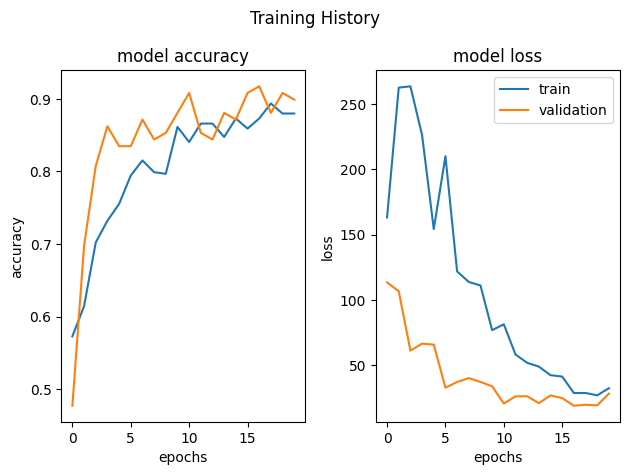

In [30]:
DL_model, accuracy, cm = train_DL_model(DL_model, CIP_SNPs_train_array, CIP_labels_train, view_training=True)

In [31]:
print("Accuracy: {:.2f}".format(accuracy * 100))
print("Confusion Matrix:")
print(cm)

Accuracy: 93.73
Confusion Matrix:
[[278  19]
 [ 15 230]]


## Train the model for ceftazidime

  - Prior to executing the following cell, ensure that you have run the cell where the DataFrame is merged and the cell where the split function was created.

In [58]:
CTZ_Train_test_dic = Split_train_test("CTZ")
# checking the shape of each dataframe or series stored in the dictionary created for drug AMC
print("CTZ")
for k, df in CTZ_Train_test_dic.items():
  print(k, df.shape)
  # counting how many of the labels have susceptible versus resistant ones
  if k.startswith("labels"):
    print(df.value_counts())


CTZ
labels_train (566,)
0    373
1    193
Name: CTZ, dtype: int64
features_train (566, 60937)
labels_test (243,)
0    160
1     83
Name: CTZ, dtype: int64
features_test (243, 60937)


In [59]:
CTZ_Train_test_dic['features_train'] = CTZ_Train_test_dic['features_train'].drop(columns=["prename"])
CTZ_Train_test_dic['features_test'] = CTZ_Train_test_dic['features_test'].drop(columns=["prename"])

In [60]:
CTZ_SNPs_train_array = scale(CTZ_Train_test_dic['features_train'])
CTZ_SNPs_test_array = scale(CTZ_Train_test_dic['features_test'])

In [61]:
DL_model = create_DL_model(CTZ_SNPs_train_array, firstlayer, numblayer, interlayer, dropout, lr, 42)

Epoch 1/20
4/4 [==============================] - 3s 520ms/step - loss: 147.9959 - accuracy: 0.5487 - val_loss: 73.0643 - val_accuracy: 0.7544
Epoch 2/20
4/4 [==============================] - 2s 520ms/step - loss: 307.6971 - accuracy: 0.6062 - val_loss: 80.5441 - val_accuracy: 0.7193
Epoch 3/20
4/4 [==============================] - 2s 477ms/step - loss: 231.7511 - accuracy: 0.6305 - val_loss: 200.5711 - val_accuracy: 0.7456
Epoch 4/20
4/4 [==============================] - 1s 331ms/step - loss: 199.7453 - accuracy: 0.6792 - val_loss: 63.5003 - val_accuracy: 0.7456
Epoch 5/20
4/4 [==============================] - 1s 317ms/step - loss: 154.9989 - accuracy: 0.6814 - val_loss: 59.7904 - val_accuracy: 0.7368
Epoch 6/20
4/4 [==============================] - 1s 339ms/step - loss: 156.6466 - accuracy: 0.7035 - val_loss: 90.1100 - val_accuracy: 0.7368
Epoch 7/20
4/4 [==============================] - 1s 341ms/step - loss: 85.7682 - accuracy: 0.7456 - val_loss: 45.3859 - val_accuracy: 0.7544

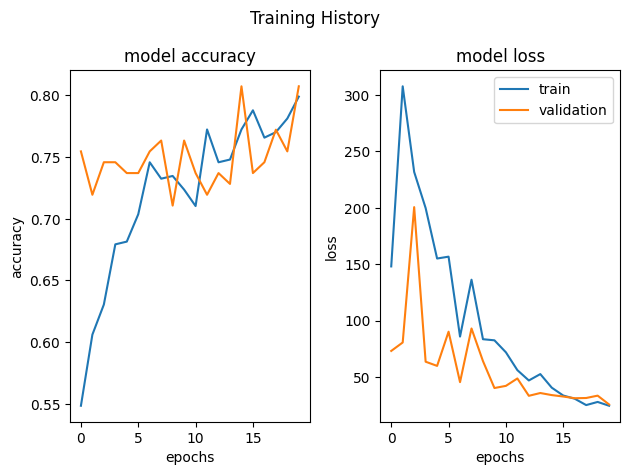

In [62]:
DL_model, accuracy, cm = train_DL_model(DL_model, CTZ_SNPs_train_array, CTZ_Train_test_dic['labels_train'], view_training=True)

In [63]:
print("Accuracy: {:.2f}".format(accuracy * 100))
print("Confusion Matrix:")
print(cm)

Accuracy: 86.04
Confusion Matrix:
[[331  42]
 [ 37 156]]


## Train the model for gentamicin


In [66]:
GEN_Train_test_dic = Split_train_test("GEN")
# checking the shape of each dataframe or series stored in the dictionary created for drug AMC
print("GEN")
for k, df in GEN_Train_test_dic.items():
  print(k, df.shape)
  # counting how many of the labels have susceptible versus resistant ones
  if k.startswith("labels"):
    print(df.value_counts())

GEN
labels_train (566,)
0    434
1    132
Name: GEN, dtype: int64
features_train (566, 60937)
labels_test (243,)
0    187
1     56
Name: GEN, dtype: int64
features_test (243, 60937)


In [67]:
GEN_Train_test_dic['features_train'] = GEN_Train_test_dic['features_train'].drop(columns=["prename"])
GEN_Train_test_dic['features_test'] = GEN_Train_test_dic['features_test'].drop(columns=["prename"])

In [68]:
GEN_SNPs_train_array = scale(GEN_Train_test_dic['features_train'])
GEN_SNPs_test_array = scale(GEN_Train_test_dic['features_test'])

In [69]:
DL_model = create_DL_model(GEN_SNPs_train_array, firstlayer, numblayer, interlayer, dropout, lr, 42)

Epoch 1/20
4/4 [==============================] - 4s 751ms/step - loss: 194.7701 - accuracy: 0.5597 - val_loss: 167.4151 - val_accuracy: 0.3158
Epoch 2/20
4/4 [==============================] - 1s 307ms/step - loss: 292.1548 - accuracy: 0.5819 - val_loss: 244.9787 - val_accuracy: 0.6228
Epoch 3/20
4/4 [==============================] - 1s 339ms/step - loss: 300.3602 - accuracy: 0.5664 - val_loss: 114.5134 - val_accuracy: 0.4298
Epoch 4/20
4/4 [==============================] - 1s 330ms/step - loss: 325.8141 - accuracy: 0.5642 - val_loss: 101.6700 - val_accuracy: 0.7018
Epoch 5/20
4/4 [==============================] - 1s 337ms/step - loss: 162.9015 - accuracy: 0.7168 - val_loss: 83.3177 - val_accuracy: 0.6667
Epoch 6/20
4/4 [==============================] - 1s 315ms/step - loss: 244.9563 - accuracy: 0.6106 - val_loss: 83.4100 - val_accuracy: 0.6228
Epoch 7/20
4/4 [==============================] - 1s 333ms/step - loss: 180.3770 - accuracy: 0.6947 - val_loss: 51.2137 - val_accuracy: 0.

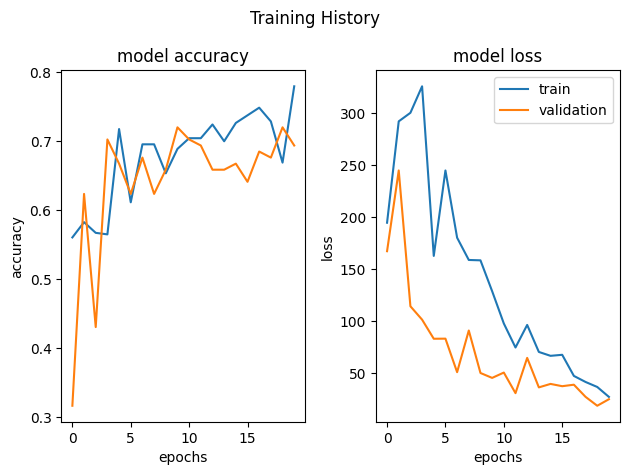

In [70]:
DL_model, accuracy, cm = train_DL_model(DL_model, GEN_SNPs_train_array, GEN_Train_test_dic['labels_train'], view_training=True)

In [71]:
print("Accuracy: {:.2f}".format(accuracy * 100))
print("Confusion Matrix:")
print(cm)

Accuracy: 75.44
Confusion Matrix:
[[304 130]
 [  9 123]]


## Train the model for ciprofloxacin.

In [75]:
CIP_Train_test_dic = Split_train_test("CIP")
# checking the shape of each dataframe or series stored in the dictionary created for drug AMC
print("CIP")
for k, df in CIP_Train_test_dic.items():
  print(k, df.shape)
  # counting how many of the labels have susceptible versus resistant ones
  if k.startswith("labels"):
    print(df.value_counts())

CIP
labels_train (566,)
0    310
1    256
Name: CIP, dtype: int64
features_train (566, 60937)
labels_test (243,)
0    133
1    110
Name: CIP, dtype: int64
features_test (243, 60937)


In [76]:
CIP_Train_test_dic['features_train'] = CIP_Train_test_dic['features_train'].drop(columns=["prename"])
CIP_Train_test_dic['features_test'] = CIP_Train_test_dic['features_test'].drop(columns=["prename"])

In [77]:
CIP_SNPs_train_array = scale(CIP_Train_test_dic['features_train'])
CIP_SNPs_test_array = scale(CIP_Train_test_dic['features_test'])

In [78]:
DL_model = create_DL_model(CIP_SNPs_train_array, firstlayer, numblayer, interlayer, dropout, lr, 42)

Epoch 1/20
4/4 [==============================] - 3s 452ms/step - loss: 179.8316 - accuracy: 0.5619 - val_loss: 65.5404 - val_accuracy: 0.7982
Epoch 2/20
4/4 [==============================] - 1s 337ms/step - loss: 235.9576 - accuracy: 0.6549 - val_loss: 81.3885 - val_accuracy: 0.8684
Epoch 3/20
4/4 [==============================] - 1s 332ms/step - loss: 180.5448 - accuracy: 0.7345 - val_loss: 55.3340 - val_accuracy: 0.8860
Epoch 4/20
4/4 [==============================] - 2s 448ms/step - loss: 106.1164 - accuracy: 0.8053 - val_loss: 45.8680 - val_accuracy: 0.8070
Epoch 5/20
4/4 [==============================] - 2s 529ms/step - loss: 120.2747 - accuracy: 0.7765 - val_loss: 50.4656 - val_accuracy: 0.8070
Epoch 6/20
4/4 [==============================] - 2s 354ms/step - loss: 87.6979 - accuracy: 0.8208 - val_loss: 56.0372 - val_accuracy: 0.8070
Epoch 7/20
4/4 [==============================] - 1s 323ms/step - loss: 72.8686 - accuracy: 0.8319 - val_loss: 42.2927 - val_accuracy: 0.8684
E

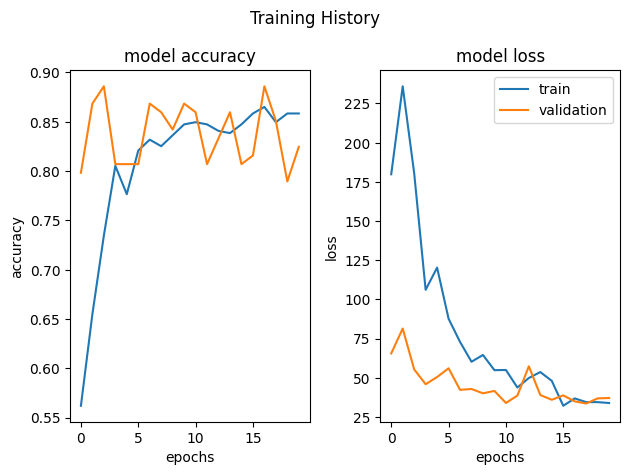

In [79]:
DL_model, accuracy, cm = train_DL_model(DL_model, CIP_SNPs_train_array, CIP_Train_test_dic['labels_train'], view_training=True)

In [80]:
print("Accuracy: {:.2f}".format(accuracy * 100))
print("Confusion Matrix:")
print(cm)

Accuracy: 92.76
Confusion Matrix:
[[288  22]
 [ 19 237]]
